Урок 8.   
На сайте запущен А/В тест с целью увеличить доход.   
В excel файле  сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.  
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.


In [2]:
from scipy import stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
data = pd.read_excel("AB_Test_Results_.xlsx")

In [5]:
data.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [7]:
print(f'Колличество строк в таблице {data.shape[0] : 9}\nКолличество столбцов в таблице {data.shape[1] : 2}')

Колличество строк в таблице     10000
Колличество столбцов в таблице  3


In [8]:
print(f"Статистические показатели для групп CONTROL и VARIANT\
    \n{data.describe().drop('25%').drop('50%').drop('75%')[['REVENUE']]}\
    \n\nСтатистические показатели для группы CONTROL\
    \n{data[data['VARIANT_NAME']== 'control'].describe().drop('25%').drop('50%').drop('75%')[['REVENUE']]}\
    \n\nСтатистические показатели для группы VARIANT\
    \n{data[data['VARIANT_NAME']== 'variant'].describe().drop('25%').drop('50%').drop('75%')[['REVENUE']]}")


Статистические показатели для групп CONTROL и VARIANT    
            REVENUE
count  10000.000000
mean       0.099447
std        2.318529
min        0.000000
max      196.010000    

Статистические показатели для группы CONTROL    
           REVENUE
count  4984.000000
mean      0.129013
std       3.007524
min       0.000000
max     196.010000    

Статистические показатели для группы VARIANT    
           REVENUE
count  5016.000000
mean      0.070070
std       1.314802
min       0.000000
max      58.630000


In [9]:
print(f"Можно заметить,\
 что максимальный чек в группе CONTROL больше, чем в VARIANT:\
\n{data[data['VARIANT_NAME']== 'control'].describe().drop('25%').drop('50%').drop('75%')[['REVENUE']].iloc[4][0]}\
 >> {data[data['VARIANT_NAME']== 'variant'].describe().drop('25%').drop('50%').drop('75%')[['REVENUE']].iloc[4][0]}")

Можно заметить, что максимальный чек в группе CONTROL больше, чем в VARIANT:
196.01 >> 58.63


Проверка на нормальность распределения и применение статистических критериев:

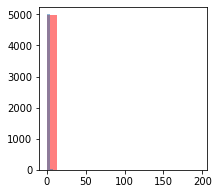

In [32]:
plt.figure(figsize=(3, 3))
control = data['REVENUE'][data['VARIANT_NAME'] == 'control']
variant =data['REVENUE'][data['VARIANT_NAME'] == 'variant']


plt.hist(control, color='r', bins=15, alpha = 0.5)
plt.hist(variant,  bins=15, alpha = 0.5)

plt.show()

In [20]:
print(f"{stats.ttest_ind(control, variant, equal_var = False)}\n\
Таким образом, мы отклоняем H0 о не равности средних квадраточных. Среднеквадратичные двух выборок равны.")

Ttest_indResult(statistic=1.268403803110966, pvalue=0.20469713432410774)
Таким образом, мы отклоняем H0 о не равности средних квадраточных. Среднеквадратичные двух выборок равны.


Мы не проверили количесво значений = 0. Поэтому результат проверки на нормальность получен с низкой визуализацией. Очистим датасет от значений REVENUE = 0

In [12]:
data1 = data[(data['REVENUE']>0)]
print(f'Колличество строк в таблице {data1.shape[0] : 9} \nКолличество столбцов в таблице {data1.shape[1] : 4}')

Колличество строк в таблице       152 
Колличество столбцов в таблице    3


In [13]:
data1.VARIANT_NAME.value_counts()

control    80
variant    72
Name: VARIANT_NAME, dtype: int64

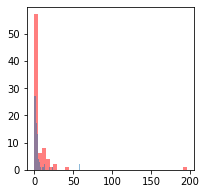

None
На графике видно, что распределение выборки не соответствует нормальному.


In [35]:
plt.figure(figsize=(3, 3))
control1 = data1['REVENUE'][data1['VARIANT_NAME'] == 'control']
variant1 =data1['REVENUE'][data1['VARIANT_NAME'] == 'variant']


plt.hist(control1, color='r', bins=40, alpha = 0.5)
plt.hist(variant1,  bins=40, alpha = 0.5)

print(f"{plt.show()}\nНа графике видно, что распределение выборки не соответствует нормальному.")

In [21]:
print(f"{stats.ttest_ind(control1, variant1 , equal_var = False)}\n\
Таким образом, мы отклоняем H0 о не равности средних квадраточных. Среднеквадратичные двух выборок равны.")

Ttest_indResult(statistic=1.1379124979933528, pvalue=0.25760685398932337)
Таким образом, мы отклоняем H0 о не равности средних квадраточных. Среднеквадратичные двух выборок равны.


In [39]:
k1 = data1[data1['VARIANT_NAME']=='control']['REVENUE'].sum()
k2 = data1[data1['VARIANT_NAME']=='variant']['REVENUE'].sum()
print(f"Сумма оборота в контрольной группе {k1:5},\nСумма оборота в тестовой группе {k2:9}")

Сумма оборота в контрольной группе 643.0,
Сумма оборота в тестовой группе    351.47


In [43]:
n1 = data1[data1['VARIANT_NAME']=='control'].shape[0]
n2 = data1[data1['VARIANT_NAME']=='variant'].shape[0]
print(f"Выборка в контрольной группе {n1:5},\nВыборка в тестовой группе {n2:8}")

Выборка в контрольной группе    80,
Выборка в тестовой группе       72


In [46]:
from statsmodels.stats import proportion
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]),
                                                   np.array([n1, n2]))

print('Проверка значимости разности данных в тестовой и контрольной группы по hi^2 критерию:\n','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Проверка значимости разности данных в тестовой и контрольной группы по hi^2 критерию:
 chisq =-10.408, pvalue = 1.000


In [48]:
if abs(pvalue) < 0.05:
    print("H0 отвергается!")
else:
    print("H0 не отвергается")

H0 не отвергается


Рекомендация менеджеру:  
Отличия в тестовой и в контрольной группе не значимы.   
То есть изменение в тестовой группе не повлияло значимо на показатели в оборота.